-----------------------------------------------------------------------------------------------------------------------



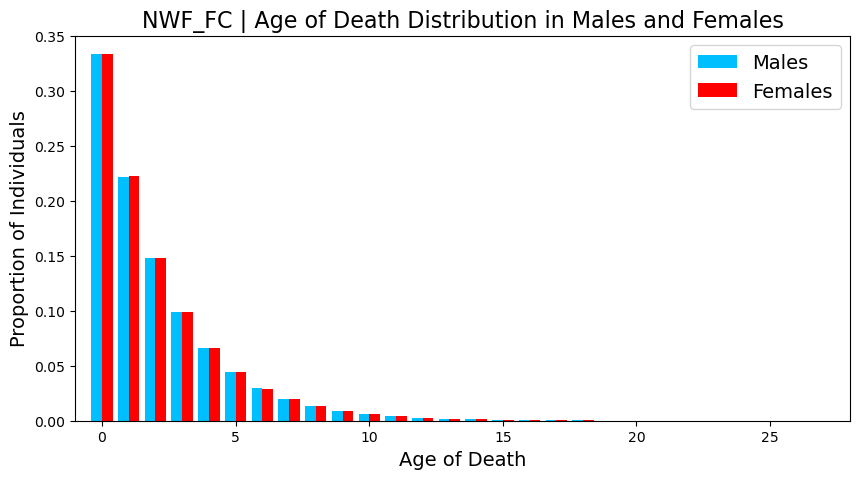

In [1]:
#Age of death
import matplotlib.pyplot as mp
import numpy as np
import os 
from collections import Counter

AoDf = []   #age of death for female
AoDm = []   #age of death for male

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/NWF_AoD_NOff_AD/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/NWF_AoD_NOff_AD/"
File = FOLDER+"NWFFC_aod_no.txt"
Text = open(File, 'r')
Values = Text.read().split()

for i in range (0,len(Values),3):
    if Values[i] == "F":
        AoDf.append(float(Values[i+1]))
    elif Values[i] == "M":
        AoDm.append(float(Values[i+1]))
Text.close()

print("-----------------------------------------------------------------------------------------------------------------------")
print()
AoDf = Counter(AoDf)
AoDm = Counter(AoDm)
all_ages = sorted(set(AoDf.keys()).union(AoDm.keys()))
total_m = sum(AoDm.values())
total_f = sum(AoDf.values())
prop_m = [AoDm.get(age, 0) / total_m for age in all_ages]
prop_f = [AoDf.get(age, 0) / total_f for age in all_ages]


x = np.arange(len(all_ages))
width = 0.4  # largeur des barres

fig, ax = mp.subplots(figsize=(10, 5))
ax.bar(x - width/2, prop_m, width, label='Males', color='deepskyblue')
ax.bar(x + width/2, prop_f, width, label='Females', color='red')
ax.set_title("NWF_FC | Age of Death Distribution in Males and Females",fontsize=16)
ax.set_xlabel("Age of Death",fontsize=14)
ax.set_ylabel("Proportion of Individuals",fontsize=14)
ax.set_xlim([-1,28])
ax.legend(fontsize=14)
fig.savefig(FOLDER_output+'NWFFC_AgeOfDeath.png') 
mp.show()


-----------------------------------------------------------------------------------------------------------------------



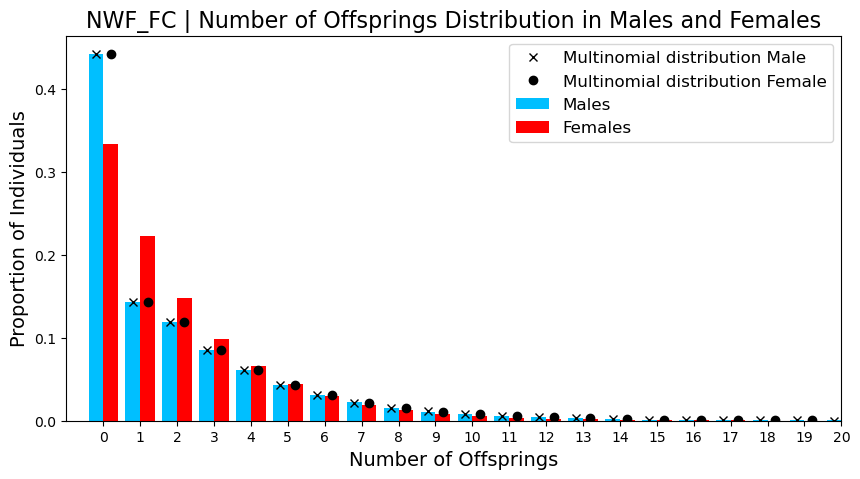

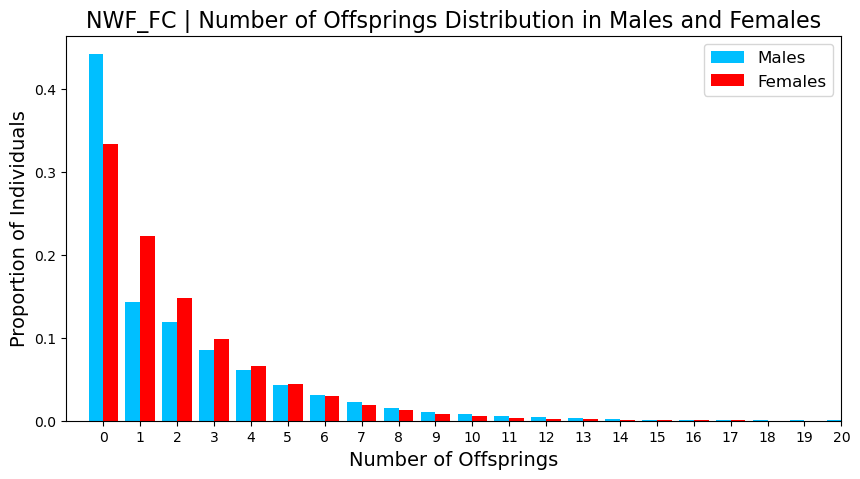

In [2]:
#Number of offsprings
import matplotlib.pyplot as mp
import numpy as np
import os 
from collections import Counter
from scipy.stats import multinomial

Noffspringsf = []
Noffspringsm = []
Agef = []
Agem = []

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/NWF_AoD_NOff_AD/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/NWF_AoD_NOff_AD/"
File = FOLDER+"NWFFC_aod_no.txt"
Text = open(File, 'r')
Values = Text.read().split()

for i in range (0,len(Values),3):
    if Values[i] == "F":
        Noffspringsf.append(float(Values[i+2]))
        Agef.append(float(Values[i+1]))
    elif Values[i] == "M":
        Noffspringsm.append(float(Values[i+2]))
        Agem.append(float(Values[i+1]))
Text.close()

print("-----------------------------------------------------------------------------------------------------------------------")
print()

Nf = len(Noffspringsf)
Nm = len(Noffspringsm)
Rf = sum(Noffspringsf)
Rm = sum(Noffspringsm)
Tm = sum(Agem)
Tf = sum(Agef)

#Multinomial distribution
Multi_m = []
Multi_f = []
for i in range (10):
    rm_multi = multinomial.rvs(Rm, [Agem[j]/Tm for j in range(len(Agem))])
    rf_multi = multinomial.rvs(Rf, [Agef[j]/Tf for j in range(len(Agef))])
    Multi_m.append(rm_multi)
    Multi_f.append(rf_multi)
Multi_m = [element for sous_liste in Multi_m for element in sous_liste]
Multi_f = [element for sous_liste in Multi_f for element in sous_liste]
Noff_m_multi = Multi_m
Noff_f_multi = Multi_f
    
Noffspringsf_multi = Counter(Noff_f_multi)
Noffspringsm_multi = Counter(Noff_m_multi)
all_Noffsprings_multi = sorted(set(Noffspringsf_multi.keys()).union(Noffspringsm_multi.keys()))
total_m_multi = sum(Noffspringsm_multi.values())
total_f_multi = sum(Noffspringsf_multi.values())
prop_m_multi = [Noffspringsm_multi.get(Noffsprings, 0) / total_m_multi for Noffsprings in all_Noffsprings_multi]
prop_f_multi = [Noffspringsf_multi.get(Noffsprings, 0) / total_f_multi for Noffsprings in all_Noffsprings_multi]

x_multi = np.arange(len(all_Noffsprings_multi))

# Number of offsprings
Noffspringsf = Counter(Noffspringsf)
Noffspringsm = Counter(Noffspringsm)
all_Noffsprings = sorted(set(Noffspringsf.keys()).union(Noffspringsm.keys()))
total_m = sum(Noffspringsm.values())
total_f = sum(Noffspringsf.values())
prop_m = [Noffspringsm.get(Noffsprings, 0) / total_m for Noffsprings in all_Noffsprings]
prop_f = [Noffspringsf.get(Noffsprings, 0) / total_f for Noffsprings in all_Noffsprings]

x = np.arange(len(all_Noffsprings))
width = 0.4  # largeur des barres

fig1, ax1 = mp.subplots(figsize=(10, 5))
ax1.bar(x - width/2, prop_m, width, label='Males', color='deepskyblue')
ax1.bar(x + width/2, prop_f, width, label='Females', color='red')
ax1.plot(x_multi - width/2, prop_m_multi, marker='x', linestyle='None', color='black', label='Multinomial distribution Male')
ax1.plot(x_multi + width/2, prop_f_multi, marker='o', linestyle='None', color='black', label='Multinomial distribution Female')

ax1.set_title("NWF_FC | Number of Offsprings Distribution in Males and Females",fontsize=16)
ax1.set_xlabel("Number of Offsprings",fontsize = 14)
ax1.set_ylabel("Proportion of Individuals",fontsize = 14)
ax1.set_xticks(range(0,int(max(Noffspringsm))))
ax1.set_xlim([-1,20])
ax1.legend(fontsize = 12)
fig1.savefig(FOLDER_output+'NWFFC_NOffsprings.png') 
mp.show()

fig1, ax1 = mp.subplots(figsize=(10, 5))
ax1.bar(x - width/2, prop_m, width, label='Males', color='deepskyblue')
ax1.bar(x + width/2, prop_f, width, label='Females', color='red')

ax1.set_title("NWF_FC | Number of Offsprings Distribution in Males and Females",fontsize=16)
ax1.set_xlabel("Number of Offsprings",fontsize = 14)
ax1.set_ylabel("Proportion of Individuals",fontsize = 14)
ax1.set_xticks(range(0,int(max(Noffspringsm))))
ax1.set_xlim([-1,20])
ax1.legend(fontsize = 12)
fig1.savefig(FOLDER_output+'NWFFC_NOffsprings_NoMult.png') 
mp.show()


-----------------------------------------------------------------------------------------------------------------------



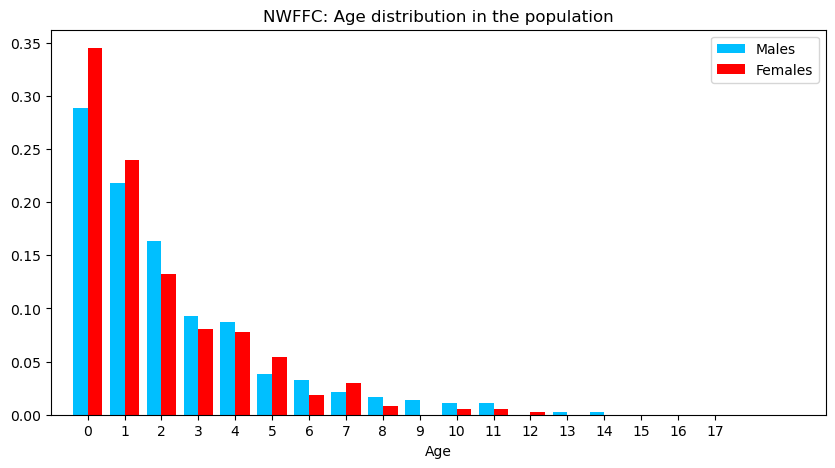

In [3]:
#Age distribution
import matplotlib.pyplot as mp
import numpy as np
import os 
from collections import Counter

Agef = []
Agem = []

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/NWF_AoD_NOff_AD/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/NWF_AoD_NOff_AD/"
File = FOLDER+"NWFFC_ad.txt"
Text = open(File, 'r')
Values = Text.read().split()

for i in range (0,len(Values),2):
    if Values[i] == "F":
        Agef.append(float(Values[i+1]))
    elif Values[i] == "M":
        Agem.append(float(Values[i+1]))
Text.close()

print("-----------------------------------------------------------------------------------------------------------------------")
print()
# Number of offsprings
Agef = Counter(Agef)
Agem = Counter(Agem)
all_Ages = sorted(set(Agef.keys()).union(Agem.keys()))
total_m = sum(Agem.values())
total_f = sum(Agef.values())
prop_m = [Agem.get(Age, 0) / total_m for Age in all_Ages]
prop_f = [Agef.get(Age, 0) / total_f for Age in all_Ages]

x = np.arange(len(all_Ages))
width = 0.4  # largeur des barres

fig, ax = mp.subplots(figsize=(10, 5))
ax.bar(x - width/2, prop_m, width, label='Males', color='deepskyblue')
ax.bar(x + width/2, prop_f, width, label='Females', color='red')
ax.set_title("NWFFC: Age distribution in the population")
ax.set_xlabel("Age")
ax.set_xticks(range(0,int(max(Agem))))
ax.set_xlim([-1,20])
ax.legend()
fig.savefig(FOLDER_output+'NWFFC_AgeDistribution.png') 
mp.show()